In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [2]:
# Generate Moon dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

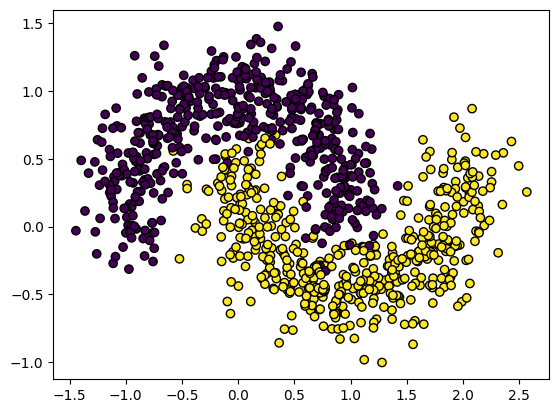

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Build the ANN model
def build_model():
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [7]:
# Train and evaluate the model with different optimizers
optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'SGD with Momentum': SGD(learning_rate=0.01, momentum=0.9),
    'SGD with Nesterov': SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
}

7/7 [==============================] - 0s 2ms/step
SGD - Test Accuracy: 0.8750
8428/8428 [==============================] - 11s 1ms/step


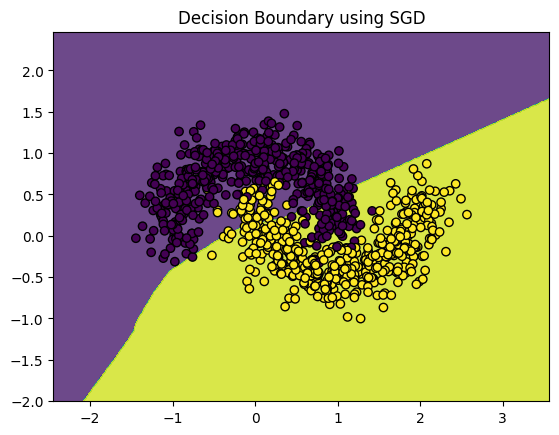

7/7 [==============================] - 0s 3ms/step
SGD with Momentum - Test Accuracy: 0.9800
8428/8428 [==============================] - 12s 1ms/step


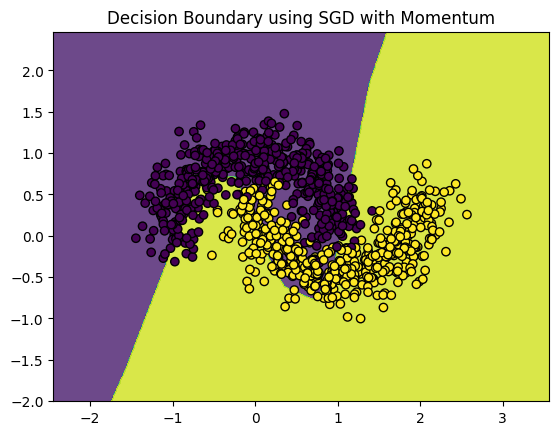

7/7 [==============================] - 0s 2ms/step
SGD with Nesterov - Test Accuracy: 0.9800
8428/8428 [==============================] - 12s 1ms/step


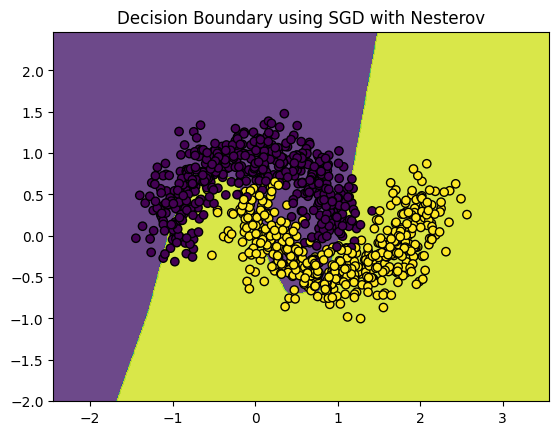

In [8]:
results = {}
histories = {}

for opt_name, optimizer in optimizers.items():
    model = build_model()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)
    histories[opt_name] = history

    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    results[opt_name] = accuracy
    print(f'{opt_name} - Test Accuracy: {accuracy:.4f}')

    # Plot decision boundary
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype("int32")
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(f'Decision Boundary using {opt_name}')
    plt.show()


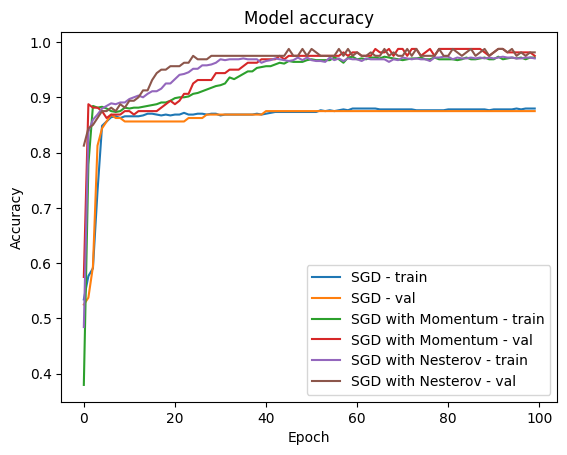

In [9]:
# Plot training history
for opt_name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{opt_name} - train')
    plt.plot(history.history['val_accuracy'], label=f'{opt_name} - val')

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [10]:
# Print results
for opt_name, accuracy in results.items():
    print(f'{opt_name}: {accuracy:.4f}')

SGD: 0.8750
SGD with Momentum: 0.9800
SGD with Nesterov: 0.9800
